In [163]:
pip install pandas_summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [164]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [165]:
import pandas as pd
import numpy as np
import datetime
from pandas_summary import DataFrameSummary

In [166]:
from tensorflow.keras.utils import to_categorical

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
df = pd.read_feather('/content/drive/MyDrive/Redes Neuronales/TP2/kaggle-rossmann-master/train_normalized_data.fth')
df_test = pd.read_feather('/content/drive/MyDrive/Redes Neuronales/TP2/kaggle-rossmann-master/test_normalized_data.fth')

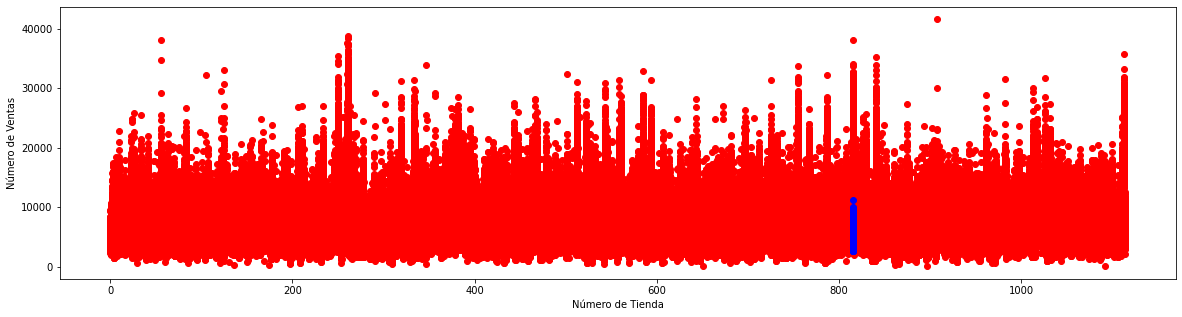

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel('Número de Tienda')
plt.ylabel('Número de Ventas')
plt.scatter(df['Store'],df['Sales'],color = 'r')
plt.scatter(df[df['Store'] == 815]['Store'],df[df['Store'] == 815]['Sales'],color = 'b')
plt.show()

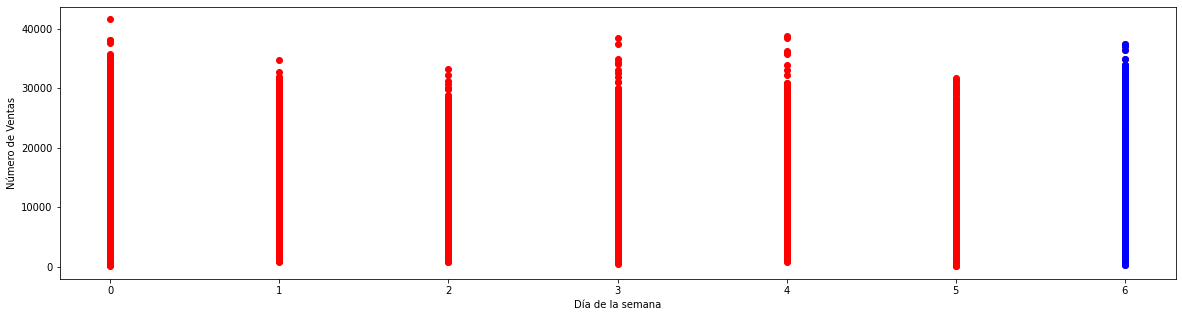

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel('Día de la semana')
plt.ylabel('Número de Ventas')
plt.scatter(df['DayOfWeek'],df['Sales'],color = 'r')
plt.scatter(df[df['DayOfWeek'] == 6]['DayOfWeek'],df[df['DayOfWeek'] == 6]['Sales'],color = 'b')
plt.show()

In [ ]:
lunes = np.mean(df[df['DayOfWeek'] == 0]['Sales'])
print(f'Lunes:{lunes}')
martes = np.mean(df[df['DayOfWeek'] == 1]['Sales'])
print(f'Martes:{martes}')
miercoles = np.mean(df[df['DayOfWeek'] == 2]['Sales'])
print(f'Miércoles:{miercoles}')
jueves = np.mean(df[df['DayOfWeek'] == 3]['Sales'])
print(f'Jueves:{jueves}')
viernes = np.mean(df[df['DayOfWeek'] == 4]['Sales'])
print(f'Viernes:{viernes}')
sabado = np.mean(df[df['DayOfWeek'] == 5]['Sales'])
print(f'Sábado:{sabado}')
domingo = np.mean(df[df['DayOfWeek'] == 6]['Sales'])
print(f'Domingo:{domingo}')

Lunes:8216.252259063516
Martes:7088.409086172763
Miércoles:6728.786678598103
Jueves:6768.214973333532
Viernes:7073.0341332871685
Sábado:5875.084934606947
Domingo:8224.723907598107


In [172]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw', 'Promo', 'SchoolHoliday',
             'StateHoliday_bool_fw', 'StateHoliday_bool_bw']

# cat_vars = ['Store', 'DayOfWeek']

In [171]:
contin_vars = ['CompetitionDistance', 
               'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 
               'Precipitationmm', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 
               'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 
               'trend_DE', 'AfterStateHoliday_bool', 'BeforeStateHoliday_bool']

In [173]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]

In [174]:
uniques.T

,uniques
Store,1115
DayOfWeek,7
Year,3
Month,12
Day,31
StateHoliday,4
CompetitionMonthsOpen,25
Promo2Weeks,26
StoreType,4
Assortment,3


# Asignación de dimensión de embeddings

In [175]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 2, 'Year': 2, 'Month': 2,
'Day': 10, 'StateHoliday': 2, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 25, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1,
'SchoolHoliday_fw' : 1, 'SchoolHoliday_bw': 1, 'Promo': 2, 'SchoolHoliday': 4,
}

In [176]:
for v in cat_vars:
    uniques_ = df[v].unique()
    uniques_.sort()
    print(v, cat_var_dict[v], len(uniques_), uniques_)
    print()

Store 50 1115 [   0    1    2 ... 1112 1113 1114]

DayOfWeek 2 7 [0 1 2 3 4 5 6]

Year 2 3 [0 1 2]

Month 2 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Day 10 31 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]

StateHoliday 2 4 [0 1 2 3]

CompetitionMonthsOpen 2 25 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

Promo2Weeks 1 26 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

StoreType 2 4 [0 1 2 3]

Assortment 3 3 [0 1 2]

PromoInterval 3 4 [0 1 2 3]

CompetitionOpenSinceYear 4 21 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Promo2SinceYear 4 8 [0 1 2 3 4 5 6 7]

State 6 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Week 25 52 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]

Events 4 22 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

# Definición de modelo

In [212]:
add_customers = True
log_output = False
output_activation = 'linear'

In [213]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2

In [214]:
def get_cat_vars_model(cat_vars, uniques, cat_var_dict):
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input")
        cat_var_inputs.append(cat_var_in)
        embed_out = Embedding(uniques[cat_var][0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs

def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

In [215]:
cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

In [ ]:
# Descomentar para ver resultados
# cat_vars_embed_outs
# cat_var_inputs
# cont_vars_inputs
# cont_vars_outs

In [216]:
first_hidden_units = 1000
second_hidden_units = 500
l2_lambda = 1e-3
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)
x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = LeakyReLU()(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

In [217]:
if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])

In [218]:
# Descomentar para ver
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Store_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 DayOfWeek_input (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 Year_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Month_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                            

In [219]:
model.save_weights('initial_weights.hdf5')

In [220]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

Cantidad en val: 30188, porcentaje: 0.9642465458145908


In [221]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(20,5))
# plt.plot((df_train[df_train['Store']==1]['Sales'].values - df_train[df_train['Store']==1]['Sales'].mean())/df_train[df_train['Store']==1]['Sales'].std())
# plt.show()
# plt.figure(figsize=(20,5))
# plt.plot(np.log(df_train[df_train['Store']==1]['Sales'].values)/np.max(np.log(df_train[df_train['Store']==1]['Sales'].values)))
# plt.show()

In [222]:
stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [223]:
df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [224]:
from tensorflow.keras import backend as K

In [225]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [226]:
def get_metric(df, sales_):
    return np.sqrt((((df['Sales'] - sales_)/df['Sales'])**2).mean())

In [227]:
get_metric(df_val, df_val['mean_by_store'])

0.3071746085338871

In [228]:
all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

In [229]:
if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns])).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # Normalización
    y_mean = df_train[y_out_columns].mean().values
    y_std = df_train[y_out_columns].std().values
    y_train = (df_train[y_out_columns].values - y_mean)/y_std
    y_val = (df_val[y_out_columns].values - y_mean)/y_std
    #y_max = df_train[y_out_columns].max().values
    #y_train = df_train[y_out_columns].values/y_max
    #y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

In [230]:
lr = 0.001
model.compile(optimizer=Adam(lr=lr), metrics=['mse', rmspe], loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [231]:
if add_customers:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_Sales_mse', verbose=1, save_best_only=True)
else:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

In [232]:
epochs = 20
batch_size = 256
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint], verbose=2)

Epoch 1/20

Epoch 1: val_Sales_mse improved from inf to 0.09038, saving model to bestmodel.hdf5
3181/3181 - 112s - loss: 0.2789 - Sales_loss: 0.1291 - Customers_loss: 0.0912 - Sales_mse: 0.1291 - Sales_rmspe: 27.2013 - Customers_mse: 0.0912 - Customers_rmspe: 10.2587 - val_loss: 0.1741 - val_Sales_loss: 0.0904 - val_Customers_loss: 0.0541 - val_Sales_mse: 0.0904 - val_Sales_rmspe: 24.9402 - val_Customers_mse: 0.0541 - val_Customers_rmspe: 8.5535 - 112s/epoch - 35ms/step
Epoch 2/20

Epoch 2: val_Sales_mse did not improve from 0.09038
3181/3181 - 110s - loss: 0.1445 - Sales_loss: 0.0737 - Customers_loss: 0.0462 - Sales_mse: 0.0737 - Sales_rmspe: 22.4999 - Customers_mse: 0.0462 - Customers_rmspe: 7.8512 - val_loss: 0.1713 - val_Sales_loss: 0.0916 - val_Customers_loss: 0.0581 - val_Sales_mse: 0.0916 - val_Sales_rmspe: 26.7817 - val_Customers_mse: 0.0581 - val_Customers_rmspe: 10.2996 - 110s/epoch - 35ms/step
Epoch 3/20

Epoch 3: val_Sales_mse did not improve from 0.09038
3181/3181 - 110s -

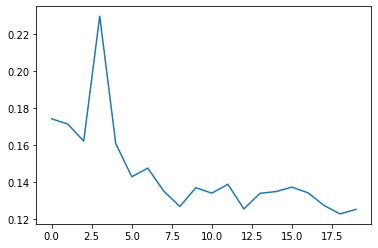

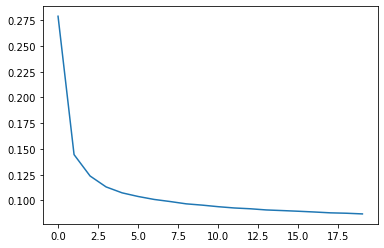

In [233]:
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_Customers_mse'])
# plt.plot(history.history['val_Sales_mse'])
plt.show()
plt.plot(history.history['loss'])
# plt.plot(history.history['Customers_mse'])
# plt.plot(history.history['Sales_mse'])

# Métrica

$$
\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}
$$

In [234]:
model.evaluate(X_val, y_val)

944/944 [==============================] - 7s 7ms/step - loss: 0.1252 - Sales_loss: 0.0749 - Customers_loss: 0.0380 - Sales_mse: 0.0749 - Sales_rmspe: 10.0902 - Customers_mse: 0.0380 - Customers_rmspe: 4.2667


[0.1252136379480362,
 0.07489656656980515,
 0.037996720522642136,
 0.07489656656980515,
 10.09022045135498,
 0.037996720522642136,
 4.266700744628906]

In [235]:
model.load_weights('bestmodel.hdf5')
model.evaluate(X_val, y_val)

944/944 [==============================] - 6s 7ms/step - loss: 0.1268 - Sales_loss: 0.0728 - Customers_loss: 0.0399 - Sales_mse: 0.0728 - Sales_rmspe: 10.1094 - Customers_mse: 0.0399 - Customers_rmspe: 4.4449


[0.1267976611852646,
 0.07279566675424576,
 0.03992178291082382,
 0.07279566675424576,
 10.109355926513672,
 0.03992178291082382,
 4.444870948791504]

In [ ]:
# model.load_weights('bestmodel.hdf5')
# model.evaluate(X_val, y_val)
# 30188/30188 [==============================] - 5s 172us/step
# [0.12197033089921382,
#  0.07211007360268763,
#  0.037183713050426136,
#  0.07211007360268763,
#  0.037183713050426136]

# [0.12932546436786652,
#  0.07751645147800446,
#  0.039259567856788635,
#  0.07751645147800446,
#  0.039259567856788635]

944/944 [==============================] - 7s 7ms/step - loss: 0.1331 - Sales_loss: 0.0737 - Customers_loss: 0.0460 - Sales_mse: 0.0737 - Sales_rmspe: 9.5186 - Customers_mse: 0.0460 - Customers_rmspe: 5.0188


[0.13313379883766174,
 0.073678158223629,
 0.045992884784936905,
 0.073678158223629,
 9.518567085266113,
 0.045992884784936905,
 5.018819332122803]

In [236]:
if log_output:
    if add_customers:
        y_pred = np.exp(model.predict(X_val, verbose=1)[0][:, 0]*max_log_y[0])
        y_pred_test = np.exp(model.predict(X_test, verbose=1)[0][:, 0]*max_log_y[0])
    else:
        y_pred = np.exp(model.predict(X_val, verbose=1)*max_log_y)[:,0]
        y_pred_test = np.exp(model.predict(X_test, verbose=1)*max_log_y)[:,0]
else:
    if add_customers:
        y_pred = (model.predict(X_val, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
        y_pred_test = (model.predict(X_test, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
    else:
#         y_pred = model.predict(X_val, verbose=1)[:,0]*y_std + y_mean
#         y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_std + y_mean
        y_pred = model.predict(X_val, verbose=1)[:,0]*y_max
        y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_max
y_pred_test[df_test['Open'] == 0] = 0

1284/1284 [==============================] - 9s 7ms/step


In [237]:
np.sqrt((((df_val['Sales'].values - y_pred)/df_val['Sales'].values)**2).sum()/len(y_pred))

0.12052990401103926

In [238]:
y_pred_test[:10]

array([3979.23  , 6447.9395, 8253.257 , 6744.0576, 6882.3984, 5192.7026,
       6874.106 , 7330.2964, 4114.606 , 5382.743 ], dtype=float32)

# Baseline

In [239]:
import pandas as pd
sample_csv = pd.read_csv('/content/drive/MyDrive/Redes Neuronales/TP2/kaggle-rossmann-master/dataset/rossmann/sample_submission.csv')

In [240]:
stores_mean = {}
for store, g_df in df.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [241]:
df_test['Sales'] = df_test['Store'].apply(stores_mean.get)
df_test.loc[df_test['Open'] == 0, 'Sales'] = 0

In [242]:
df_test[['Store', 'Sales']].head(10)

,Store,Sales
0,0,4759.096031
1,2,6942.568678
2,6,8817.050891
3,7,5539.358418
4,8,6562.337612
5,9,5568.420918
6,10,8030.977041
7,11,7589.598214
8,12,5034.747182
9,13,5508.567394


In [243]:
y_pred_test

array([ 3979.23  ,  6447.9395,  8253.257 , ...,  7060.37  , 26312.059 ,
        7900.3823], dtype=float32)

In [244]:
df_test[df_test['Open'] == 0][['Store', 'Sales']].head()

,Store,Sales
543,702,0.0
676,878,0.0
840,1096,0.0
1399,702,0.0
1532,878,0.0


In [245]:
sample_csv['Sales'] = df_test['Sales']

In [246]:
sample_csv.to_csv(f'/content/drive/MyDrive/Redes Neuronales/TP2/kaggle-rossmann-master/submision_baseline.csv', index=False)

In [210]:
sample_csv.head()

,Id,Sales
0,1,4759.096031
1,2,6942.568678
2,3,8817.050891
3,4,5539.358418
4,5,6562.337612


# Sumbit a la competición

In [247]:

sample_csv = pd.read_csv('/content/drive/MyDrive/Redes Neuronales/TP2/kaggle-rossmann-master/dataset/rossmann/sample_submission.csv')
sample_csv['Sales'] = y_pred_test
sample_csv.head()

sample_csv.to_csv(f'/content/drive/MyDrive/Redes Neuronales/TP2/kaggle-rossmann-master/dataset/rossmann/submision_{add_customers}-{log_output}-{output_activation}-{l2_lambda}-{first_hidden_units}-{epochs}-{batch_size}-{lr}.csv', index=False)


# Analisis de embedings

In [ ]:
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

(7, 2)


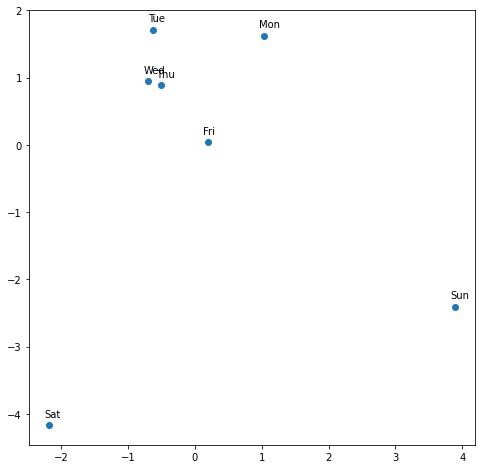

In [ ]:
model.load_weights('bestmodel.hdf5')
plot_embed('DayOfWeek_Embed', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])

(12, 2)


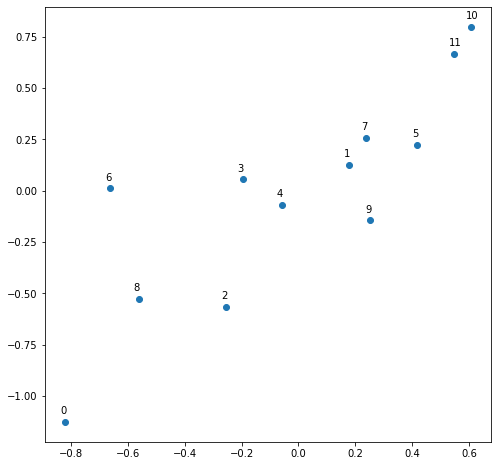

In [ ]:
plot_embed('Month_Embed', list(range(12)))

(1115, 50)


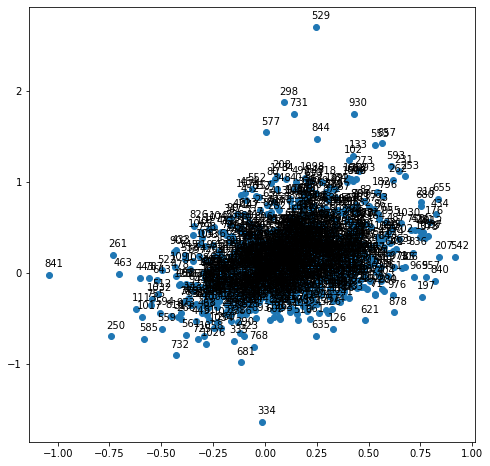

In [ ]:
plot_embed('Store_Embed',list(range(1115)))

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
day_of_week_embedding.shape

NameError: ignored

In [ ]:
tsne = TSNE(n_components=2, random_state=1, learning_rate=10, n_iter=10000)
Y = tsne.fit_transform(day_of_week_embedding)
names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

NameError: ignored

In [ ]:
cat_vars

['Store',
 'DayOfWeek',
 'Year',
 'Month',
 'Day',
 'StateHoliday',
 'CompetitionMonthsOpen',
 'Promo2Weeks',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'CompetitionOpenSinceYear',
 'Promo2SinceYear',
 'State',
 'Week',
 'Events',
 'Promo_fw',
 'Promo_bw',
 'StateHoliday_bool_fw',
 'StateHoliday_bool_bw',
 'SchoolHoliday_fw',
 'SchoolHoliday_bw']

## Store embeddings

In [ ]:
submodel = Model(cat_var_inputs + cont_vars_inputs, merged)

In [ ]:
submodel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Store_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 DayOfWeek_input (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 Year_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Month_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                            

In [ ]:
submodel.save('embeddings_model.hdf5')